In [65]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas 
import math

In [82]:
def distance(a, b):
    return math.sqrt(np.sum(np.square(np.array(a) - np.array(b))))

def midpoint(a, b, c, d):
    return ((a+ c)/2, (b + d)/2)


In [165]:
DATA_PATH = "data/New/"

DISCARD_AMOUNT = [2400, 2450, 0, 0, 0, 0, 0, 2550]

# 10g
MASS = 10

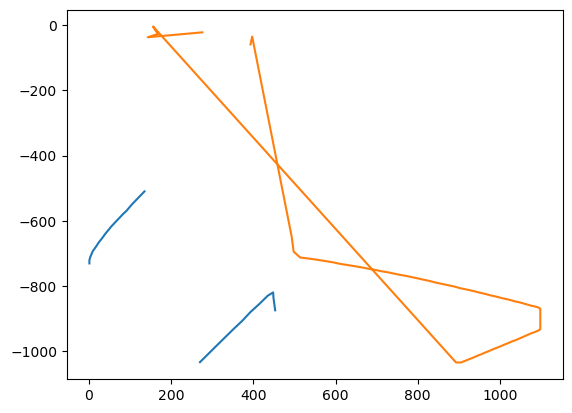

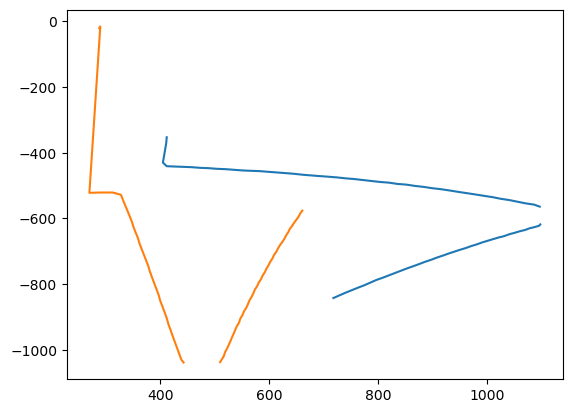

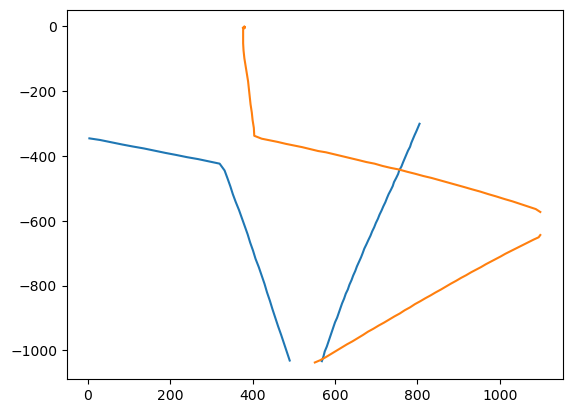

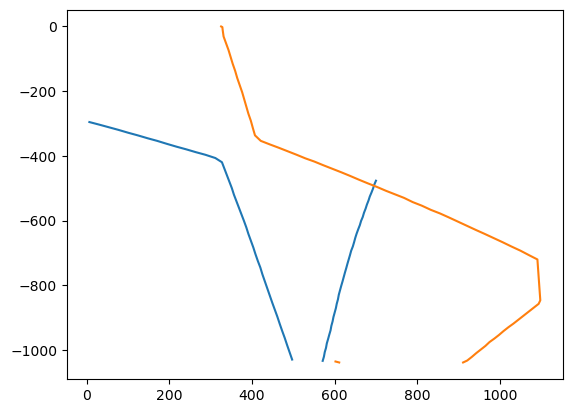

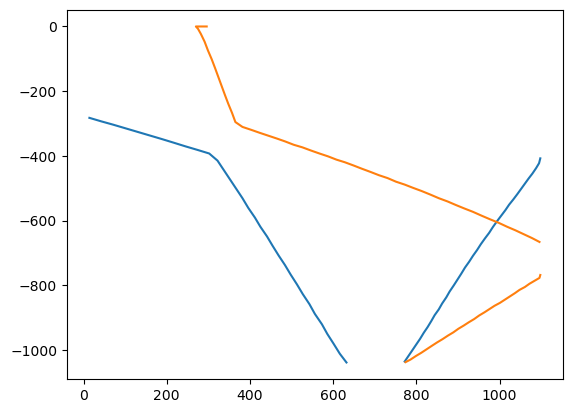

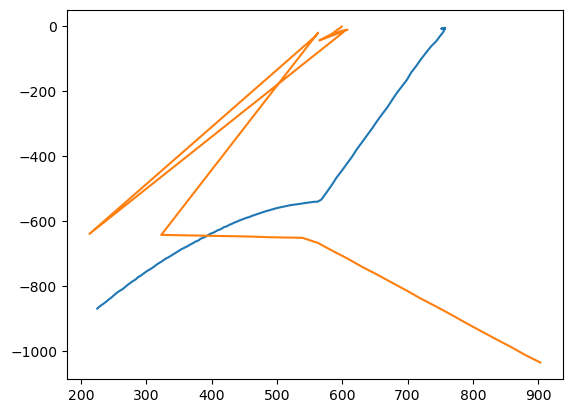

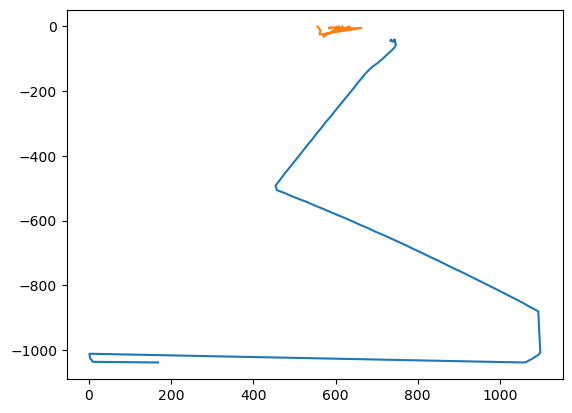

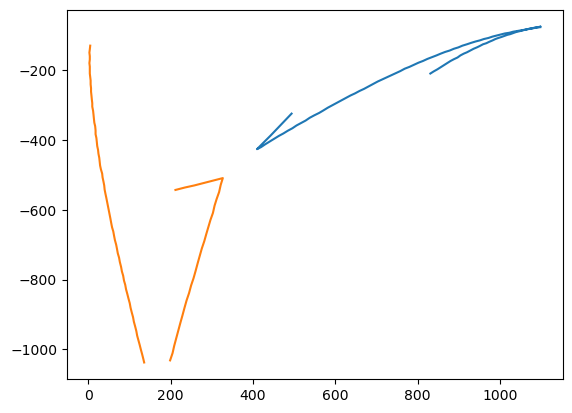

In [68]:
for i in range(1, 9):
    data = pandas.read_csv(DATA_PATH + "{}.csv".format(i))
    data = data[data["timestamp"] > DISCARD_AMOUNT[i-1]]      

    plt.plot(data["position_px_x-hotpink"], -1 * data["position_px_y-hotpink"])    
    plt.plot(data["position_px_x-lightorange"], -1 * data["position_px_y-lightorange"])          
    plt.show()

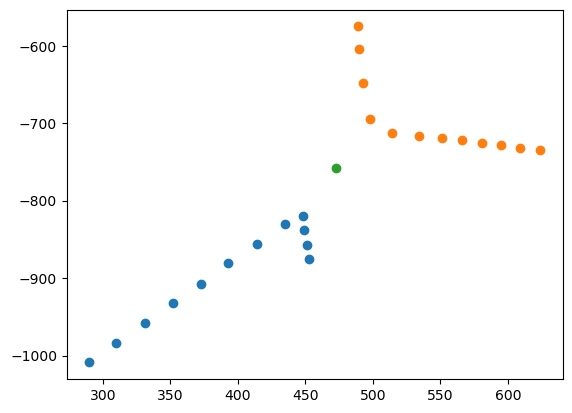

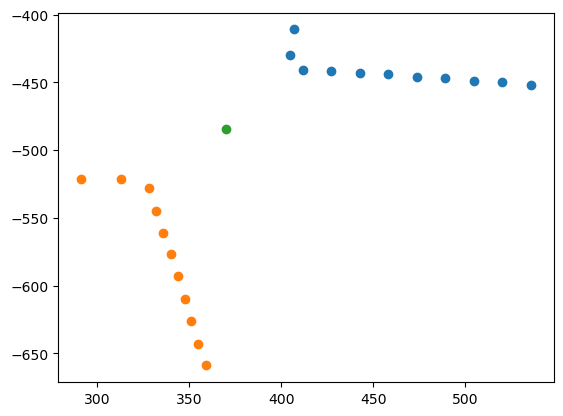

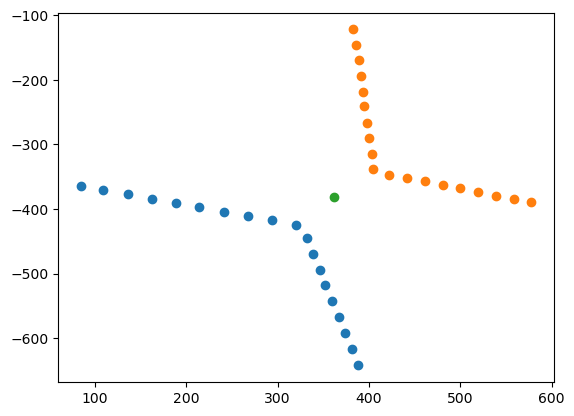

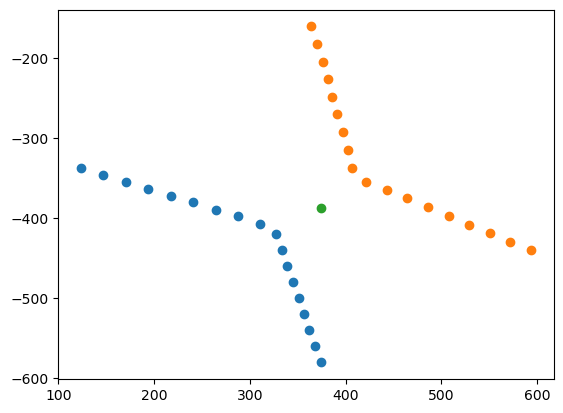

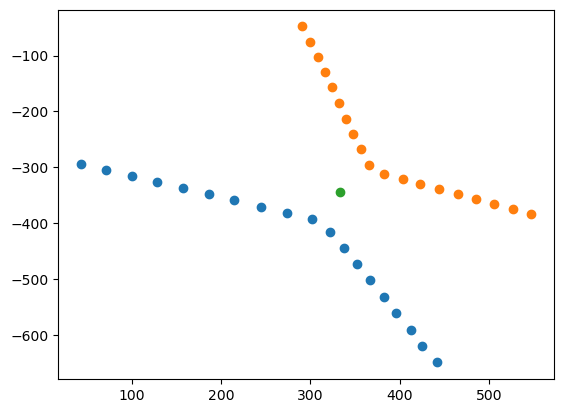

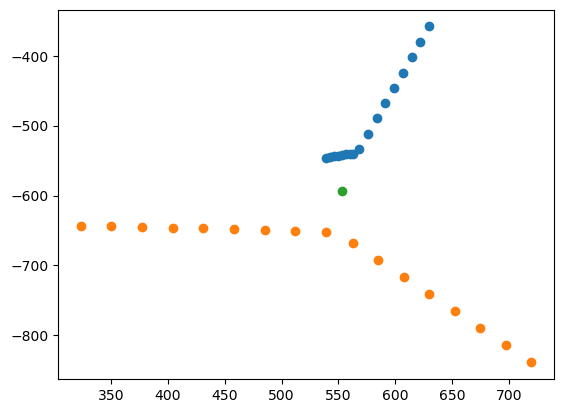

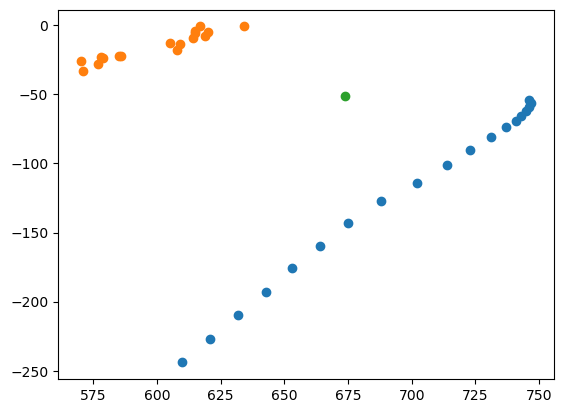

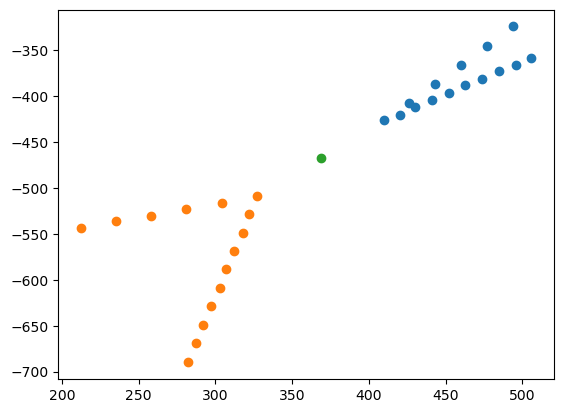

In [178]:
aroundContacts = []

for i in range(1, 9):
    data = pandas.read_csv(DATA_PATH + "{}.csv".format(i)) 
    data = data[data["timestamp"] > DISCARD_AMOUNT[i-1]]      

    minDist = 100000
    mintime = 0
    for _, row in data.iterrows():      
        time = row["timestamp"]
        pink_x = row["position_px_x-hotpink"]
        pink_y = row["position_px_y-hotpink"]      
        pink_vx = row["vx-hotpink"]
        pink_vy = row["vy-hotpink"]
        orange_x = row["position_px_x-lightorange"]
        orange_y = row["position_px_y-lightorange"]              
        orange_vx = row["vx-lightorange"]
        orange_vy = row["vy-lightorange"]  

        if distance([pink_x, pink_y], [orange_x, orange_y]) < minDist:
            mintime = time
            minDist = distance([pink_x, pink_y], [orange_x, orange_y])            
    
    aroundContact = data[abs(data['timestamp'] - mintime) < 300]

    beforeContact = aroundContact[aroundContact['timestamp'] < mintime]
    afterContact = aroundContact[aroundContact['timestamp'] >= mintime]         

    plt.scatter(aroundContact["position_px_x-hotpink"], -1 * aroundContact["position_px_y-hotpink"])    
    plt.scatter(aroundContact["position_px_x-lightorange"], -1 * aroundContact["position_px_y-lightorange"])          

    mid = aroundContact[aroundContact['timestamp'] == mintime]
    midx, midy = midpoint(mid["position_px_x-hotpink"], mid["position_px_y-hotpink"], mid["position_px_x-lightorange"], mid["position_px_y-lightorange"])
    plt.scatter(midx, -midy)
    plt.show()

    aroundContacts.append((beforeContact, afterContact))

In [141]:
before, after = aroundContacts[0]

before

,frame_no,timestamp,size_px-hotpink,position_px_x-hotpink,position_px_y-hotpink,rx-hotpink,ry-hotpink,vx-hotpink,vy-hotpink,ax-hotpink,ay-hotpink,size_px-lightorange,position_px_x-lightorange,position_px_y-lightorange,rx-lightorange,ry-lightorange,vx-lightorange,vy-lightorange,ax-lightorange,ay-lightorange
12,72,2404.5,11.0,453.0,875.0,35.369625,68.318812,-3.511395,-42.921814,-7.764981,0.428789,61,393,59,30.684906,4.606640,4.995747,245.183962,1536.561957,5012.989337
13,73,2437.0,11.0,451.0,857.0,35.213467,66.913396,-7.825084,-31.632443,-94.038761,210.600464,38,397,35,30.997221,2.732752,10.323133,267.042522,1627.493946,5278.387531
14,74,2469.2,11.0,449.0,838.0,35.057310,65.429902,-15.627440,-14.337739,-234.001691,567.837885,15,493,648,38.492770,50.594960,16.030095,274.929100,319.642967,-4436.712475


In [182]:
def findUncertainty(x):
    return np.average(x), np.std(x)/math.sqrt(len(x))

def removeNan(x):
    return x[~np.isnan(x)]    

for d in aroundContacts:
    before_, after_ = d
    before = before_.copy()
    after = after_.copy()

    dist = before.diff().fillna(0.)
    before["vx-hotpink"] = dist["position_px_x-hotpink"] / dist["timestamp"]
    before["vy-hotpink"] = dist["position_px_y-hotpink"] / dist["timestamp"]
    before["vx-lightorange"] = dist["position_px_x-lightorange"] / dist["timestamp"]  
    before["vy-lightorange"] = dist["position_px_y-lightorange"] / dist["timestamp"]  

    dist2 = after.copy().diff().fillna(0.)
    after["vx-hotpink"] = dist2["position_px_x-hotpink"] / dist2["timestamp"]
    after["vy-hotpink"] = dist2["position_px_y-hotpink"] / dist2["timestamp"]    
    after["vx-lightorange"] = dist2["position_px_x-lightorange"] / dist2["timestamp"]  
    after["vy-lightorange"] = dist2["position_px_y-lightorange"] / dist2["timestamp"]      

    beforePinkPX, beforePinkPXUncert = findUncertainty(removeNan(np.array(before["vx-hotpink"])) * MASS)
    beforePinkPY, beforePinkPYUncert = findUncertainty(removeNan(np.array(before["vy-hotpink"])) * MASS)
    beforeOrangePX, beforeOrangePXUncert = findUncertainty(removeNan(np.array(before["vx-lightorange"])) * MASS)
    beforeOrangePY, beforeOrangePYUncert = findUncertainty(removeNan(np.array(before["vy-lightorange"])) * MASS)    

    afterPinkPX, afterPinkPXUncert = findUncertainty(removeNan(np.array(after["vx-hotpink"])) * MASS)
    afterPinkPY, afterPinkPYUncert = findUncertainty(removeNan(np.array(after["vy-hotpink"])) * MASS)
    afterOrangePX, afterOrangePXUncert = findUncertainty(removeNan(np.array(after["vx-lightorange"])) * MASS)
    afterOrangePY, afterOrangePYUncert = findUncertainty(removeNan(np.array(after["vy-lightorange"])) * MASS)

    totalBeforePX, totalBeforePXUncert = beforePinkPX + beforeOrangePX, math.sqrt(beforePinkPXUncert **2 + beforeOrangePXUncert **2)
    totalAfterPX, totalAfterPXUncert = afterPinkPX + afterOrangePX, math.sqrt(afterPinkPXUncert **2 + afterOrangePXUncert **2)

    totalBeforePY, totalBeforePYUncert = beforePinkPY + beforeOrangePY, math.sqrt(beforePinkPYUncert **2 + beforeOrangePYUncert **2)
    totalAfterPY, totalAfterPYUncert = afterPinkPY + afterOrangePY, math.sqrt(afterPinkPYUncert **2 + afterOrangePYUncert **2)

    beforeOverAfterX, beforeOverAfterXUncert = totalBeforePX / totalAfterPX, totalBeforePXUncert / totalAfterPXUncert
    beforeOverAfterY, beforeOverAfterYUncert = totalBeforePY / totalAfterPY, totalBeforePYUncert / totalAfterPYUncert       

    print(beforeOverAfterX, beforeOverAfterXUncert)
    print(beforeOverAfterY, beforeOverAfterYUncert)
    print()

    

-0.0011886783649383912 0.6194166735575632
0.6409884883151178 2.1290413582811785

0.8643743168592782 0.0
0.8952655903540264 0.0

1.1179540931224752 1.1764979819970194
1.0650775856241341 1.107302208524931

1.0851155600480475 2.3320410897664576
1.035917775638622 1.6353578027704323

1.0393833684121514 0.7998331115583087
1.0060205452360336 0.6270366177339773

1.0116773021730523 1.4978081133508363
0.927714475800048 0.5948140785831029

0.22083639890478524 0.5834860476169581
0.3319123423814488 0.7279158950793698

1.1019045312454425 3.78044064054303
1.1635092195402335 2.329170659080028



In [131]:
before, after = aroundContacts[3]

dist = before.diff().fillna(0.)
before["vx-hotpink"] = dist["position_px_x-hotpink"] / (dist["timestamp"] / 1000)
before["vy-hotpink"] = dist["position_px_y-hotpink"] / (dist["timestamp"] / 1000)    
before["vx-lightorange"] = dist["position_px_x-lightorange"] / (dist["timestamp"] / 1000)   
before["vy-lightorange"] = dist["position_px_y-lightorange"] / (dist["timestamp"] / 1000)   


print(before["vx-hotpink"])
print(before["vy-hotpink"])
print(before["vx-lightorange"])
print(before["vy-lightorange"])



9            NaN
10    863.309353
11    709.876543
12    647.887324
13    752.351097
14    716.510903
15    670.391061
16    707.692308
17    766.773163
Name: vx-hotpink, dtype: float64
9            NaN
10    323.741007
11    246.913580
12    253.521127
13    282.131661
14    249.221184
15    251.396648
16    246.153846
17    319.488818
Name: vy-hotpink, dtype: float64
9            NaN
10    215.827338
11    185.185185
12    140.845070
13    156.739812
14    155.763240
15    167.597765
16    153.846154
17    159.744409
Name: vx-lightorange, dtype: float64
9            NaN
10    791.366906
11    679.012346
12    619.718310
13    689.655172
14    685.358255
15    614.525140
16    707.692308
17    702.875399
Name: vy-lightorange, dtype: float64
